## Prolific Bonus

In [221]:
import pandas as pd

exp_start_time = pd.to_datetime("2025-08-11 7:30:00")
exp_end_time = pd.to_datetime("2025-08-11 10:00:00")

# First, let's examine the data structure to understand the issue
df = pd.read_csv("results/DPU+Explanations+-+Prolific+-+BetweenSubject+-+Pilot_11_8_2025.csv")

print("Column names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nStartDate column info:")
print(f"Data type: {df['StartDate'].dtype}")
print("Sample values:")
print(df['StartDate'].tail(5))

Column names:
['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q389_Browser', 'Q389_Version', 'Q389_Operating System', 'Q389_Resolution', 'Consent timing_First Click', 'Consent timing_Last Click', 'Consent timing_Page Submit', 'Consent timing_Click Count', 'Consent', 'prolific_id', 'Q1_First Click', 'Q1_Last Click', 'Q1_Page Submit', 'Q1_Click Count', 'Q118_First Click', 'Q118_Last Click', 'Q118_Page Submit', 'Q118_Click Count', 'Q110', 'Q160', 'Q163', 'Q165', 'Q178', 'Q164', 'Q179', 'Q608_First Click', 'Q608_Last Click', 'Q608_Page Submit', 'Q608_Click Count', 'Q609', 'Tutorial', 'Q613', 'Q653_First Click', 'Q653_Last Click', 'Q653_Page Submit', 'Q653_Click Count', 'Q655', 'Q192_First Click', 'Q192_Last Click', 'Q192_Page Submit', 'Q192_Click Count

In [222]:
# Fixed version with better error handling
df = pd.read_csv("results/DPU+Explanations+-+Prolific+-+BetweenSubject+-+Pilot_11_8_2025.csv")
date = "8/11/2025"

# Clean the data first - remove any rows where StartDate might be the header or invalid
df_cleaned = df[df['StartDate'] != 'Start Date'].copy()  # Remove header rows if any
df_cleaned = df_cleaned.dropna(subset=['StartDate'])  # Remove rows with missing StartDate
print(f"df_cleaned first StartDate and ProlificID values:\n{df_cleaned[['StartDate', 'ProlificID']].tail(3)}")

# Convert to datetime with error handling
try:
    df_cleaned['StartDate'] = pd.to_datetime(df_cleaned['StartDate'], errors='coerce')
    target_date = pd.to_datetime(date)
    
    # Filter the data
    filtered_df = df_cleaned[
        (df_cleaned['StartDate'] >= exp_start_time) & (df_cleaned['StartDate'] <= exp_end_time) &
        (df_cleaned['ProlificID'].astype(str).str.len() > 20)
    ]
    
    print(f"Original data shape: {df.shape}")
    print(f"Cleaned data shape: {df_cleaned.shape}")
    print(f"Filtered data shape: {filtered_df.shape}")
    
except Exception as e:
    print(f"Error in datetime conversion: {e}")
    print("Let's examine the problematic values:")
    print(df['StartDate'].value_counts().head(10))

df_cleaned first StartDate and ProlificID values:
              StartDate                ProlificID
55  2025-08-11 07:57:57  66b8830e5812d8df82589ef3
56  2025-08-11 08:03:54  59e71a3b1ac65d0001eb47ac
57  2025-08-11 08:48:13  5c6e60b04e08ad00018cc995
Original data shape: (58, 104)
Cleaned data shape: (57, 104)
Filtered data shape: (15, 104)


In [264]:
# calculate bonus
df = pd.read_csv("results/DPU+Explanations+-+Prolific+-+BetweenSubject+-+Pilot_11_8_2025.csv")
date = "8/11/2025"
# Clean the data first - remove any rows where StartDate might be the header or invalid
df_cleaned = df[df['StartDate'] != 'Start Date'].copy()  # Remove header rows if any
df_cleaned = df_cleaned.dropna(subset=['StartDate'])  # Remove rows with missing StartDate

# Convert to datetime with error handling
df_cleaned['StartDate'] = pd.to_datetime(df_cleaned['StartDate'], errors='coerce')
target_date = pd.to_datetime(date)

# Filter the data
filtered_df = df_cleaned[
    (df_cleaned['StartDate'] >= exp_start_time) & (df_cleaned['StartDate'] <= exp_end_time) &
    (df_cleaned['ProlificID'].astype(str).str.len() > 20)
]
filtered_df = filtered_df.dropna(subset=['bonus_group'])

print(filtered_df[['StartDate', 'ProlificID', 'bonus_group']])
# correct_answers = answer_dict
bonus_fields = ["ProlificID", "Bonus"]

group_to_bonus = {"1": 0, "2": 0.5, "3": 1}
filtered_df["Bonus"] = filtered_df["bonus_group"].str[-1].map(group_to_bonus).fillna(0)
"""bonus"""
bonus_df = filtered_df[filtered_df["Bonus"] != 0]
# df = get_bonus(df, bonus, correct_answers)
bonus_df = filtered_df[bonus_fields]
bonus_df = bonus_df[bonus_df["Bonus"] != 0]
bonus_df.to_csv("bonus.csv", index=False)

             StartDate                ProlificID bonus_group
43 2025-08-11 07:32:41  5fea2970cbe0699d90756fd7       APPL3
44 2025-08-11 07:32:55  68109d22b0ba84c17333ecab        2322
45 2025-08-11 07:40:47  58c26f473977190001f54116        2322
46 2025-08-11 07:41:51  66fd3f6c93c24ecc119be354       APPL1
47 2025-08-11 07:34:57  62916bb383e38e21d42cef2b       APPL1
48 2025-08-11 07:36:36  5fc2c0cfdb80f9025c6b4810        2322
51 2025-08-11 07:46:05  6658d02b830a00e979619fb8       APPL1
54 2025-08-11 08:47:08  659c0682d109f8537a89fdd3        2321
57 2025-08-11 08:48:13  5c6e60b04e08ad00018cc995       APPL2


## Qualtrics Data

In [258]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "results/DPU+Explanations+-+Prolific+-+BetweenSubject+-+Pilot_11_8_2025.csv"
qualtrics_results = pd.read_csv(csv_path)

# Parse StartDate and EndDate as datetime, coerce errors, and use dayfirst if your data is in that format
qualtrics_results['StartDate'] = pd.to_datetime(qualtrics_results['StartDate'], errors='coerce', dayfirst=True)
qualtrics_results['EndDate'] = pd.to_datetime(qualtrics_results['EndDate'], errors='coerce', dayfirst=True)

# Drop rows where parsing failed (NaT)
qualtrics_results = qualtrics_results.dropna(subset=['StartDate', 'EndDate'])
qualtrics_results.columns


Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName',
       ...
       'AI_4', 'AI_5', 'comments', 'Q261', 'Random_ID', 'AWSURL', 'group',
       'ProlificID', 'agent_level', 'bonus_group'],
      dtype='object', length=104)

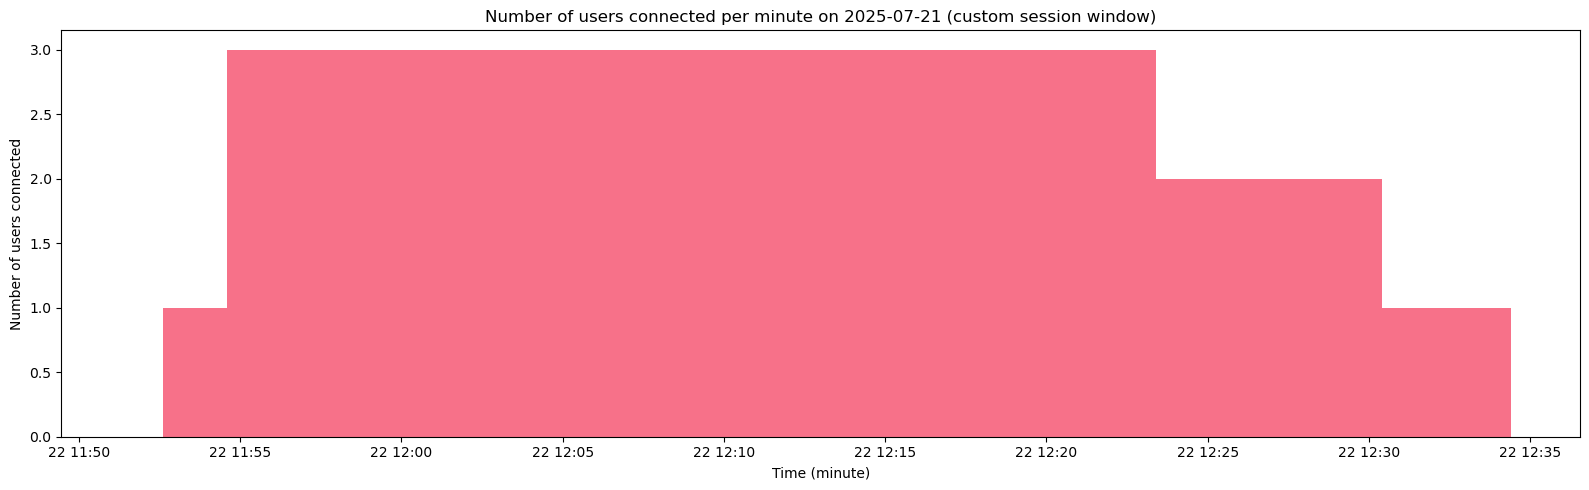

In [225]:
import numpy as np
import pandas as pd
target_date = pd.to_datetime('2025-07-22')
next_day = target_date + pd.Timedelta(days=1)

# Ensure group is int
qualtrics_results['group'] = qualtrics_results['group'].astype(int)

# Get the correct start/end seconds for each row
start_seconds = qualtrics_results.apply(
    lambda row: row['Q193_First Click'] if row['group'] != 0 else row['Q192_First Click'], axis=1)
end_seconds = qualtrics_results.apply(
    lambda row: row['Q193_Page Submit'] if row['group'] != 0 else row['Q192_Page Submit'], axis=1)

# Convert to numeric (in case of string)
start_seconds = pd.to_numeric(start_seconds, errors='coerce').fillna(0)
end_seconds = pd.to_numeric(end_seconds, errors='coerce').fillna(0)

# Calculate new session start/end times
qualtrics_results['SessionStart'] = qualtrics_results['StartDate'] + pd.to_timedelta(start_seconds, unit='s')
qualtrics_results['SessionEnd'] = qualtrics_results['StartDate'] + pd.to_timedelta(end_seconds, unit='s')

# Use SessionStart and SessionEnd for session filtering
mask = (qualtrics_results['SessionStart'] < next_day) & (qualtrics_results['SessionEnd'] >= target_date)
sessions = qualtrics_results[mask].copy()

if not sessions.empty:
    first_minute = sessions['SessionStart'].min().replace(second=0, microsecond=0)
    last_minute = sessions['SessionEnd'].max().replace(second=0, microsecond=0)
    all_minutes = pd.date_range(first_minute, last_minute, freq='min')
    counts = []
    for minute in all_minutes:
        count = ((sessions['SessionStart'] <= minute) & (sessions['SessionEnd'] >= minute)).sum()
        counts.append(count)
    plt.figure(figsize=(16, 5))
    plt.bar(all_minutes, counts, width=0.02)
    plt.xlabel('Time (minute)')
    plt.ylabel('Number of users connected')
    plt.title('Number of users connected per minute on 2025-07-21 (custom session window)')
    plt.tight_layout()
    plt.show()
else:
    print("No sessions found for the specified date.")

In [259]:
qualtrics_results[qualtrics_results['prolific_id'] == '5c6e60b04e08ad00018cc995']

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,AI_4,AI_5,comments,Q261,Random_ID,AWSURL,group,ProlificID,agent_level,bonus_group
57,2025-08-11 08:48:13,2025-08-11 09:26:44,0,86.181.196.152,100,2310,1,2025-08-11 09:26:45,R_8JfJidj80Qmrs2m,NaN,...,5,5,NaN,NaN,9827540657,NaN,3,5c6e60b04e08ad00018cc995,APPL2,APPL2


## DPU SQL Data

In [227]:

# import sys
# import os
# sys.path.append(os.getcwd())
from mysql_data_explorer import get_all_tables_from_mysql, alter_database_tables
import pandas as pd

all_tabels = get_all_tables_from_mysql()
print(all_tabels.keys())

✅ Connected to Azure MySQL database: mysql_dpu
📊 Found 6 tables: ['actions', 'feedback_actions', 'player', 'tutorial_actions', 'user_choices', 'users']
   ✅ Loaded 'actions': 0 rows, 11 columns
   ✅ Loaded 'feedback_actions': 1065 rows, 12 columns
   ✅ Loaded 'player': 1 rows, 2 columns
   ✅ Loaded 'tutorial_actions': 7960 rows, 8 columns
   ✅ Loaded 'user_choices': 368 rows, 14 columns
   ✅ Loaded 'users': 129 rows, 4 columns
🔌 Database connection closed
dict_keys(['actions', 'feedback_actions', 'player', 'tutorial_actions', 'user_choices', 'users'])


In [228]:
# alter_database_tables("ALTER TABLE user_choices CHANGE COLUMN unique_ens unique_envs VARCHAR(255);")

In [229]:
feedback_actions = all_tabels['feedback_actions']
feedback_actions['feedback_unique_env'] = feedback_actions['feedback_unique_env'].fillna(0).astype(int)

print(feedback_actions.columns)
feedback_actions.tail(3)

Index(['id', 'user_id', 'env_state', 'agent_action', 'feedback_action',
       'feedback_explanation', 'action_index', 'timestamp', 'episode_index',
       'agent_path', 'similarity_level', 'feedback_unique_env'],
      dtype='object')


,id,user_id,env_state,agent_action,feedback_action,feedback_explanation,action_index,timestamp,episode_index,agent_path,similarity_level,feedback_unique_env
1062,1063,5c6e60b04e08ad00018cc995,"[[[2, 5, 0], [2, 5, 0], [2, 5, 0], [2, 5, 0], ...",2,1,,7,2025-08-11 15:21:45,4,"models/-0.5,3,4,-3,0.1Steps50Grid8_20250616/be...",3.0,1
1063,1064,5c6e60b04e08ad00018cc995,"[[[2, 5, 0], [2, 5, 0], [1, 0, 0], [1, 0, 0], ...",2,0,,4,2025-08-11 15:24:39,5,"models/2,2,4,-4,0.1Steps50Grid8_20250617/best_...",3.0,18
1064,1065,5c6e60b04e08ad00018cc995,"[[[2, 5, 0], [2, 5, 0], [2, 5, 0], [1, 0, 0], ...",2,0,,5,2025-08-11 15:24:39,5,"models/2,2,4,-4,0.1Steps50Grid8_20250617/best_...",3.0,18


In [230]:
import numpy as np

user_choices = all_tabels['user_choices']
user_choices.columns
# Fill NaN with empty string, then split each string by ',' into a list
user_choices['unique_envs'] = user_choices['unique_envs'].fillna("").apply(lambda x: x.split(',') if x != "" else [])
# Only invert 'choice_to_update' for rows before 2025-07-29
cutoff_date = pd.to_datetime('2025-08-10')
# Convert 'timestamp' to datetime if it's not already
if user_choices['timestamp'].dtype == object:
    user_choices['timestamp'] = pd.to_datetime(user_choices['timestamp'], errors='coerce')

mask = user_choices['timestamp'] >= cutoff_date
user_choices.loc[mask, 'choice_to_update'] = 1 - user_choices.loc[mask, 'choice_to_update']
user_choices.tail(10)

,id,user_id,old_agent_path,new_agent_path,timestamp,demonstration_time,episode_index,choice_to_update,choice_explanation,simillarity_level,feedback_count,feedback_score,unique_envs,examples_shown
358,359,66a35864d80b66f563731c3e,"models/2,2,4,-4,0.1Steps50Grid8_20250617/best_...","models/-0.5,3,4,-3,0.1Steps50Grid8_20250616/be...",2025-08-11 14:26:43,2025-08-11 14:26:28,4,0,,2,22.0,9.0,[],1.0
359,360,66a35864d80b66f563731c3e,"models/-0.5,3,4,-3,0.1Steps50Grid8_20250616/be...","models/-1,3,4,-3,0.1Steps60Grid8_20250618/best...",2025-08-11 14:28:34,2025-08-11 14:28:27,5,1,,2,25.0,10.0,[],1.0
360,361,659c0682d109f8537a89fdd3,"models/2,2,4,-4,0.1Steps50Grid8_20250617/best_...","models/-0.5,3,4,-3,0.1Steps50Grid8_20250616/be...",2025-08-11 14:44:01,2025-08-11 14:43:47,3,0,,1,10.0,5.0,[],1.0
361,362,659c0682d109f8537a89fdd3,"models/-0.5,3,4,-3,0.1Steps50Grid8_20250616/be...","models/2,2,4,-4,0.1Steps50Grid8_20250617/best_...",2025-08-11 14:45:39,2025-08-11 14:45:19,4,1,,1,14.0,5.0,[],1.0
362,363,659c0682d109f8537a89fdd3,"models/2,2,4,-4,0.1Steps50Grid8_20250617/best_...","models/-1,3,4,-3,0.1Steps60Grid8_20250618/best...",2025-08-11 14:46:57,2025-08-11 14:46:31,5,0,,1,16.0,6.0,[],1.0
363,364,5c6e60b04e08ad00018cc995,"models/3,3,3,0.1,0.1Steps100Grid8_20250602/bes...","models/3,3,4,0.2,0.05Steps50Grid8_20250604/bes...",2025-08-11 15:14:28,2025-08-11 15:12:54,1,1,,3,1.0,1.0,[3],1.0
364,365,5c6e60b04e08ad00018cc995,"models/3,3,4,0.2,0.05Steps50Grid8_20250604/bes...","models/2,2,4,-4,0.1Steps50Grid8_20250617/best_...",2025-08-11 15:17:08,2025-08-11 15:16:07,2,0,,3,3.0,3.0,[15],1.0
365,366,5c6e60b04e08ad00018cc995,"models/2,2,4,-4,0.1Steps50Grid8_20250617/best_...","models/-0.5,3,4,-3,0.1Steps50Grid8_20250616/be...",2025-08-11 15:20:40,2025-08-11 15:19:16,3,0,,3,4.0,4.0,[12],1.0
366,367,5c6e60b04e08ad00018cc995,"models/-0.5,3,4,-3,0.1Steps50Grid8_20250616/be...","models/2,2,4,-4,0.1Steps50Grid8_20250617/best_...",2025-08-11 15:22:32,2025-08-11 15:21:46,4,1,,3,5.0,4.0,[3],1.0
367,368,5c6e60b04e08ad00018cc995,"models/2,2,4,-4,0.1Steps50Grid8_20250617/best_...","models/2,2,4,-4,0.1Steps50Grid8_20250617/best_...",2025-08-11 15:25:07,2025-08-11 15:24:40,5,1,,3,7.0,6.0,[3],1.0


In [256]:
# Display all rows in user_choices for the given prolific_id
prolific_id = "5c6e60b04e08ad00018cc995"
print(feedback_actions[feedback_actions['user_id'] == prolific_id])
print(user_choices[user_choices['user_id'] == prolific_id])


        id                   user_id  \
1058  1059  5c6e60b04e08ad00018cc995   
1059  1060  5c6e60b04e08ad00018cc995   
1060  1061  5c6e60b04e08ad00018cc995   
1061  1062  5c6e60b04e08ad00018cc995   
1062  1063  5c6e60b04e08ad00018cc995   
1063  1064  5c6e60b04e08ad00018cc995   
1064  1065  5c6e60b04e08ad00018cc995   

                                              env_state agent_action  \
1058  [[[2, 5, 0], [2, 5, 0], [2, 5, 0], [2, 5, 0], ...            2   
1059  [[[2, 5, 0], [2, 5, 0], [2, 5, 0], [2, 5, 0], ...            2   
1060  [[[2, 5, 0], [2, 5, 0], [2, 5, 0], [2, 5, 0], ...            2   
1061  [[[2, 5, 0], [2, 5, 0], [1, 0, 0], [1, 0, 0], ...            0   
1062  [[[2, 5, 0], [2, 5, 0], [2, 5, 0], [2, 5, 0], ...            2   
1063  [[[2, 5, 0], [2, 5, 0], [1, 0, 0], [1, 0, 0], ...            2   
1064  [[[2, 5, 0], [2, 5, 0], [2, 5, 0], [1, 0, 0], ...            2   

     feedback_action feedback_explanation  action_index           timestamp  \
1058               1   

In [232]:
# Filter user_choises after 2025-07-15 (timestamp is str, format: 'YYYY-MM-DD HH:MM:SS')
user_choices['timestamp'] = pd.to_datetime(user_choices['timestamp'], format='%Y-%m-%d %H:%M:%S')
feedback_actions['timestamp'] = pd.to_datetime(feedback_actions['timestamp'], format='%Y-%m-%d %H:%M:%S')
filter_date = exp_start_time
user_choises_after_date = user_choices[user_choices['timestamp'] > filter_date]
feedback_actions_after_date = feedback_actions[feedback_actions['timestamp'] > filter_date]
print(user_choises_after_date['timestamp'].min(), user_choises_after_date['timestamp'].max())
print(feedback_actions_after_date['timestamp'].min(), feedback_actions_after_date['timestamp'].max())

2025-08-11 13:43:11 2025-08-11 15:25:07
2025-08-11 10:18:08 2025-08-11 15:24:39


In [233]:
# show the feedback board
from minigrid_custom_env import *
from minigrid_custom_train import *
from dpu_clf import *
from termcolor import colored
import ast

def print_state_grid(state):
    print("Grid View:")
    for i in range(7):
        row = ""
        for j in range(6,-1, -1):
            obj_idx, color_idx, _ = state[i][j]
            obj_name = IDX_TO_OBJECT.get(obj_idx, '???')
            color_name = IDX_TO_COLOR.get(color_idx, 'white')
            # cell_str = colored(f"{obj_name[:3]}", color='1')
            if obj_name == 'empty':
                row += "[ ] "
            elif obj_name == 'wall':
                row += "[#] "
            elif obj_name == 'ball':
                # Use the first letter of the object and color for compactness
                row += f"[{color_name[0].upper()}] "
            else:
                row += f"[{obj_name[0].upper()}] "
        print(row)

prolific_id = '5c670a430d80fd00014264f9'

feedbacks = feedback_actions[feedback_actions['user_id'] == prolific_id]
index = 0
for i in range(len(feedbacks)):
    print(f"index: {i}, agent_action: {list(feedbacks['agent_action'])[i]}, feedback_action: {list(feedbacks['feedback_action'])[i]}")
    state = ast.literal_eval(list(feedbacks['env_state'])[i])
    print_state_grid(state)

index: 0, agent_action: 2, feedback_action: 1
Grid View:
[L] [ ] [ ] [ ] [ ] [#] [#] 
[ ] [ ] [ ] [ ] [ ] [#] [#] 
[ ] [ ] [ ] [ ] [ ] [#] [#] 
[ ] [ ] [L] [G] [ ] [#] [#] 
[ ] [ ] [ ] [ ] [ ] [#] [#] 
[#] [#] [#] [#] [#] [#] [#] 
[#] [#] [#] [#] [#] [#] [#] 
index: 1, agent_action: 2, feedback_action: 0
Grid View:
[ ] [ ] [ ] [ ] [#] [#] [#] 
[ ] [ ] [ ] [ ] [#] [#] [#] 
[ ] [ ] [ ] [ ] [#] [#] [#] 
[ ] [L] [G] [ ] [#] [#] [#] 
[ ] [ ] [ ] [ ] [#] [#] [#] 
[#] [#] [#] [#] [#] [#] [#] 
[#] [#] [#] [#] [#] [#] [#] 
index: 2, agent_action: 0, feedback_action: 2
Grid View:
[ ] [ ] [L] [ ] [ ] [#] [#] 
[L] [ ] [L] [B] [ ] [#] [#] 
[R] [ ] [ ] [ ] [ ] [#] [#] 
[ ] [ ] [ ] [ ] [ ] [#] [#] 
[#] [#] [#] [#] [#] [#] [#] 
[#] [#] [#] [#] [#] [#] [#] 
[#] [#] [#] [#] [#] [#] [#] 
index: 3, agent_action: 0, feedback_action: 1
Grid View:
[#] [#] [#] [#] [#] [#] [#] 
[G] [G] [#] [#] [#] [#] [#] 
[ ] [ ] [#] [#] [#] [#] [#] 
[ ] [ ] [#] [#] [#] [#] [#] 
[ ] [ ] [#] [#] [#] [#] [#] 
[ ] [ ] [#] [#] [#

In [234]:
# prolific_data
start_pilot_time = exp_start_time#pd.to_datetime('2025-07-28 13:10:00')
end_pilot_time = exp_end_time + pd.Timedelta(hours=10)
# Filter only users with user_id length > 20 chars
user_choices_prolific = user_choices[
    (user_choices['timestamp'] >= start_pilot_time) & (user_choices['timestamp'] <= end_pilot_time) &
    (user_choices['user_id'].apply(lambda x: isinstance(x, str) and len(x) > 20))]

user_feedback_prolific = feedback_actions[
    (feedback_actions['timestamp'] >= start_pilot_time) & (feedback_actions['timestamp'] <= end_pilot_time) &
    (feedback_actions['user_id'].apply(lambda x: isinstance(x, str) and len(x) > 20))]

names_to_remove = ['LAst544444444444444444444444444444444444']
user_choices_prolific = user_choices_prolific[~user_choices_prolific['user_id'].isin(names_to_remove)]
user_feedback_prolific = user_feedback_prolific[~user_feedback_prolific['user_id'].isin(names_to_remove)]
user_feedback_prolific['user_id'].unique()

array(['5fea2970cbe0699d90756fd7', '68109d22b0ba84c17333ecab',
       '62916bb383e38e21d42cef2b', '5fc2c0cfdb80f9025c6b4810',
       '58c26f473977190001f54116', '66fd3f6c93c24ecc119be354',
       '659c0682d109f8537a89fdd3', '66a35864d80b66f563731c3e',
       '5c6e60b04e08ad00018cc995'], dtype=object)

In [235]:
import pandas as pd
def calculate_choice_times(user_choices_df, feedback_actions_df):
    """
    Calculate time difference between feedback and choices
    """
    print("⏱️ Calculating choice times...")
    
    # Convert timestamps to datetime
    user_choices_df['choice_time'] = pd.to_datetime(user_choices_df['timestamp'])
    feedback_actions_df['feedback_time'] = pd.to_datetime(feedback_actions_df['timestamp'])
    
    # Initialize time differences list
    time_diffs = []
    
    for idx, choice in user_choices_df.iterrows():
        user_id = choice['user_id']
        choice_time = choice['choice_time']
        old_agent_path = choice['old_agent_path']
        
        # Find relevant feedback actions
        relevant_feedback = feedback_actions_df[
            (feedback_actions_df['user_id'] == user_id) &
            (feedback_actions_df['agent_path'] == old_agent_path) &
            (feedback_actions_df['feedback_time'] < choice_time) &
            (feedback_actions_df['feedback_time'] > (choice_time - pd.Timedelta(minutes=5)))
        ]
        
        if len(relevant_feedback) > 0:
            # Get the latest feedback before the choice
            latest_feedback = relevant_feedback.loc[relevant_feedback['feedback_time'].idxmax()]
            feedback_time = latest_feedback['feedback_time']
            # print(f"choice_time:{choice_time}, feedback_time: {feedback_time}, demonstration_time: {choice['demonstration_time']}")
            
            # Calculate time difference in seconds
            time_diff = (choice_time - feedback_time).total_seconds()
            if time_diff < 0 or time_diff > 1000:
                print(f"Warning: Negative or too large time difference for user {user_id}: {time_diff} seconds")
                time_diff = None
            time_diffs.append(time_diff)
            
            # print(f"User {user_id}: {time_diff:.1f}s between feedback and choice")
        else:
            time_diffs.append(None)
            print(f"-------------------   User {user_id}: No relevant feedback found")
    
    # Add time differences to the dataframe
    user_choices_df['time_since_feedback'] = time_diffs
    
    return user_choices_df

# Run the analysis
user_choices_with_times = calculate_choice_times(user_choices_prolific, user_feedback_prolific)

# # Show results
# print(f"\n📊 Time analysis results:")
# print(user_choices_with_times[['user_id', 'choice_to_update', 'simillarity_level', 'time_since_feedback']].head(10))


# # Convert demonstration_time to local timezone and remove tz info
# user_choices_copy = user_choices_prolific.copy()
# user_choices_copy['demonstration_time_local'] = (
#     pd.to_datetime(user_choices_copy['demonstration_time'], utc=True, errors='coerce')
#     .dt.tz_convert('Europe/London')
#     .dt.tz_localize(None)
# )

# # Recalculate time since feedback using the local demonstration time
# # Calculate time since demonstration in seconds (float)
# user_choices_copy['time_since_demonstration'] = (
#     (user_choices_copy['timestamp'] - user_choices_copy['demonstration_time_local']).dt.total_seconds()
# )


# Summary by similarity level
print(f"\n⏱️ Average time by similarity level:")
for level in range(5):
    level_data = user_choices_with_times[user_choices_with_times['simillarity_level'] == level]
    if len(level_data) > 0:
        avg_time = level_data['time_since_feedback'].mean()
        print(f"Level {level}: {avg_time:.1f}s average")

⏱️ Calculating choice times...
-------------------   User 5fc2c0cfdb80f9025c6b4810: No relevant feedback found
-------------------   User 5fc2c0cfdb80f9025c6b4810: No relevant feedback found

⏱️ Average time by similarity level:
Level 1: 21.8s average
Level 2: 18.8s average
Level 3: 85.4s average
Level 4: 18.3s average


In [236]:
# models_mean_scores = {'AllColorsLL1_0526': 1.98,
# 'AllColorsLL2_0604': 2.82,
# 'AllColorsLH_0617': 4.51,
# 'OnlyBlueLL_0625': 1.66,
# 'NoRedLH1_0612': 5.27,
# 'NoRedLL_0616': 3.68,
# 'OnlyGreenLL_0429': -2.04,
# 'NoRedLH2_0618': 6.01,
# 'NoRedLH3_0612': 5.38,
# 'NoRedLL_G_0617': 4.49,
# 'OnlyBlueLH_0706': 3.49,}


# def calculate_correct_answers_by_similarity_level(user_choices_df, models_eval_dict):
#     """
#     Calculate correct answers for each similarity level (0-4)
#     """
#     print("🔍 Analyzing user choices...")
    
#     # Extract model names from agent paths
#     def extract_model_name(path):
#         if pd.isna(path):
#             return None
#         if 'models/' in str(path):
#             parts = str(path).split('/')
#             if len(parts) >= 2:
#                 return parts[1]  # Get model folder name
#         return str(path)
    
#     # Create new columns with extracted model names
#     user_choices_df = user_choices_df.copy()
#     user_choices_df['old_model_name'] = user_choices_df['old_agent_path'].apply(extract_model_name)
#     user_choices_df['new_model_name'] = user_choices_df['new_agent_path'].apply(extract_model_name)
    
#     # Get values for old and new models
#     user_choices_df['old_value'] = user_choices_df['old_model_name'].map(models_eval_dict)
#     user_choices_df['new_value'] = user_choices_df['new_model_name'].map(models_eval_dict)
    
#     # Remove rows with missing values
#     final_df = user_choices_df.dropna(subset=['old_value', 'new_value'])
#     print(f"📊 Clean data shape: {final_df.shape}")
    
#     # Calculate correct decisions
#     final_df['correct_decision'] = (
#         ((final_df['choice_to_update'] == 1) & (final_df['new_value'] >= final_df['old_value'])) |
#         ((final_df['choice_to_update'] == 0) & (final_df['new_value'] <= final_df['old_value']))
#     )
    
#     # Calculate correct answers for each similarity level
#     correct_answers_by_level = []
    
#     print("\n📈 Results by similarity level:")
#     for level in range(5):
#         level_data = final_df[final_df['simillarity_level'] == level]
        
#         if len(level_data) > 0:
#             correct_decisions = level_data['correct_decision'].sum()
#             total_decisions = len(level_data)
#             accuracy = correct_decisions / total_decisions
#             accuracy = round(accuracy, 2)
            
#             print(f"🎚️ Level {level}: {correct_decisions}/{total_decisions} correct ({accuracy*100:.1f}%)")
#             correct_answers_by_level.append(accuracy)
#         else:
#             print(f"��️ Level {level}: No data")
#             correct_answers_by_level.append(0)
    
#     return correct_answers_by_level

# # Run the analysis
# correct_answers = calculate_correct_answers_by_similarity_level(user_choices, models_mean_scores)
# print(f"\n🎯 Final Result: {correct_answers}")


# import matplotlib.pyplot as plt

# groups = ['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4']
# colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f']

# plt.figure(figsize=(8, 5))
# bars = plt.bar(groups, [c * 100 for c in correct_answers], color=colors)

# plt.ylabel('Correctness (%)')
# plt.title('Correctness by Similarity Level')
# plt.ylim(0, 100)
# plt.legend(bars, groups, title="Similarity Level")
# plt.show()

# Analyze The Results


In [237]:
unique_envs_scores = {'AllColorsLL1_0526': [0, 0.6, 5.8, 8.0, 3.0, 7.5, -3.4, -1.5, 6.0, 1.5, 1.0, 0.6, 4.1, 4.1, -10.4, -0.2, 2.1, 4.3, 4.6],
                    'AllColorsLL2_0604': [0, -1.0, 5.5, 3.2, 3.0, 7.8, -3.4, 1.9, 7.5, 1.2, -8.0, 0.6, 4.1, 9.3, -6.0, -0.2, -7.0, 4.8, 0.9],
                    'AllColorsLH_0617': [0, 4.5, 6.2, 8.7, 4.8, 8.5, -7.0, 2.1, 7.5, 6.4, 0.8, 4.2, 5.1, -47.0, 0.3, 2.1, 6.9, 4.1, -0.0],
                    'OnlyBlueLL_0625': [0, -2.5, 3.3, -3.1, 3.5, 6.1, 2.5, 0.5, 7.3, 1.1, 2.8, 3.6, -0.8, 5.8, -3.8, -1.9, 2.5, -53.0, 3.0],
                    'NoRedLH1_0612': [0, 4.8, 6.5, 10.3, 5.2, 4.8, 3.2, 5.0, 7.1, 9.5, -1.0, 6.9, 5.2, -27.0, 0.3, -53.0, 5.0, 5.2, 5.1],
                    'NoRedLL_0616': [0, 1.4, 5.8, 6.3, 3.0, 5.5, 1.2, 2.1, 7.3, 3.4, 2.3, 6.6, 4.1, 6.1, 0.3, 0.9, 4.2, 5.2, 4.3],
                    'OnlyGreenLL_0429': [0, 1.2, 4.1, 3.9, 3.0, 0.2, -4.9, -4.5, 1.3, 3.2, -12.5, -6.9, 0.1, -4.7, -12.5, -1.8, -8.7, 1.5, -0.7],
                    'NoRedLH2_0618': [0, 4.8, 6.5, 10.3, 5.1, 9.6, 4.8, 1.0, 8.4, 6.5, -5.0, 5.5, 6.5, -47.0, -4.0, -5.0, -46.0, 5.1, 5.0],
                    'NoRedLH3_0612': [0, 1.5, 7.1, 10.3, 5.1, 9.0, 4.8, -38.0, 8.4, 6.4, 3.3, 5.0, 6.4, -48.0, -4.0, -53.0, 3.1, 5.2, 5.1],
                    'NoRedLL_G_0617': [0, 1.9, 6.5, 8.0, 5.2, 7.5, 2.0, 2.1, 7.3, 4.2, 2.8, 6.9, 4.1, 5.8, -49.0, -3.0, 4.1, 5.0, 3.0],
                    'OnlyBlueLH_0706': [0, -0.4, 3.3, 8.6, 3.5, 3.2, 2.4, 2.3, 7.3, 6.8, 6.3, 3.6, 2.2, 3.0, -5.0, 1.6, 0.2, 5.6, 2.8],}

new_models_dict = {
    1: {'path': 'models/3,3,3,0.1,0.1Steps100Grid8_20250602/best_model.zip', 'name': 'AllColorsLL1_0526', 'vector': (3, 3, 3, 0.1, 0.1), 'optional_unique_env': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]},
    2: {'path': 'models/3,3,4,0.2,0.05Steps50Grid8_20250604/best_model.zip', 'name': 'AllColorsLL2_0604', 'vector': (3, 3, 4, 0.2, 0.05), 'optional_unique_env':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 17, 18]},
    3: {'path': 'models/2,2,4,-4,0.1Steps50Grid8_20250617/best_model.zip', 'name': 'AllColorsLH_0617', 'vector': (2, 2, 4, -3, 0.1), 'optional_unique_env':  [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17]},
    4: {'path': 'models/-1,-1,4,0.2,0.1Steps70Grid8_20250625/best_model.zip', 'name': 'OnlyBlueLL_0625', 'vector': (-1, -1, 4, 0.2, 0.1), 'optional_unique_env':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18]},
    5: {'path': 'models/-0.5,2,4,-3,0.1Steps50Grid8_20250612_good/best_model.zip', 'name': 'NoRedLH1_0612', 'vector': (-0.5, 2, 4, -3, 0.1), 'optional_unique_env': [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 17, 18]},
    6: {'path': 'models/-0.5,3,4,0.2,0.1Steps50Grid8_20250616/best_model.zip', 'name': 'NoRedLL_0616', 'vector': (-0.5, 3, 4, 0.2, 0.1), 'optional_unique_env':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]},
    7: {'path': 'models/-1,4,-1,0.2,0.1Steps60Grid8_20250618/best_model', 'name': 'OnlyGreenLL_0429', 'vector': (-0.1, 3, -0.1, 0, 0.01), 'optional_unique_env':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]},
    8: {'path': 'models/-1,3,4,-3,0.1Steps60Grid8_20250618/best_model.zip', 'name': 'NoRedLH2_0618', 'vector': (-1, 3, 4, -3, 0.1), 'optional_unique_env': [1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 17, 18]},
    9: {'path': 'models/-0.5,3,4,-3,0.1Steps50Grid8_20250616/best_model.zip', 'name': 'NoRedLH3_0612', 'vector': (-0.5, 3, 4, -3, 0.1), 'optional_unique_env': [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 16, 17, 18]},
    10: {'path': 'models/-1,3,4,0.2,0.2Steps50Grid8_20250617/best_model.zip', 'name': 'NoRedLL_G_0617', 'vector': (-1, 3, 4, 0.2, 0.2), 'optional_unique_env': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18]},
    11: {'path': 'models/-1,-1,4,-3,0.1Steps100Grid8_20250706/best_model.zip', 'name': 'OnlyBlueLH_0706', 'vector': (-1, -1, 4, -3, 0.1), 'optional_unique_env': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18]}
}

models_mean_scores = {'AllColorsLL1_0526': 1.98,
                'AllColorsLL2_0604': 2.82,
                'AllColorsLH_0617': 4.51,
                'OnlyBlueLL_0625': 1.66,
                'NoRedLH1_0612': 5.27,
                'NoRedLL_0616': 3.68,
                'OnlyGreenLL_0429': -2.04,
                'NoRedLH2_0618': 6.01,
                'NoRedLH3_0612': 5.38,
                'NoRedLL_G_0617': 4.49,
                'OnlyBlueLH_0706': 3.49,}

path_to_name = {v['path']: v['name'] for v in new_models_dict.values()}



In [238]:
def create_user_results_df(user_choices_df, feedback_actions_df, unique_envs_scores, path_to_name, models_mean_scores, qualtrics_df=None):
    """
    Create user_results DataFrame with columns for each episode (1-5):
    user_id, similarity_level, feedback_score1-5, choice1-5, good_choice1-5, choice_time1-5, update_agent1-5, Trust_the_agent
    
    Parameters:
    user_choices_df: DataFrame with user choices
    feedback_actions_df: DataFrame with feedback actions
    unique_envs_scores: dict - Mapping from model name to scores for each unique environment
    path_to_name: dict - Mapping from model path to model name
    trust_mapping: dict - Manual mapping of user_id to Trust_the_agent values (Q594)
    """
    print("🔄 Creating user_results DataFrame...")
    
    # Get unique users
    unique_users = feedback_actions_df['user_id'].unique()
    
    # Initialize results list
    results = []
    
    for user_id in unique_users:
        if len(user_id) < 20:
            print(f"Skipping user {user_id} due to short ID length")
            continue
        # Get user's choices and feedback
        user_choices = user_choices_df[user_choices_df['user_id'] == user_id].copy()
        user_feedback = feedback_actions_df[feedback_actions_df['user_id'] == user_id].copy()

        if len(user_feedback) == 0:
            continue
        
        # Get similarity level (should be same for all choices of a user)
        if not user_choices.empty:
            similarity_level = user_choices['simillarity_level'].iloc[0] if 'simillarity_level' in user_choices.columns else None
        else:
            similarity_level = user_feedback['similarity_level'].iloc[0] if 'similarity_level' in user_feedback.columns else None
        
        # Get Trust_the_agent from qualtrics Q594 if available
        trust_the_agent = None
        trust_question_number = 'Q594'  # Default question number for Trust_the_agent
        if qualtrics_df is not None and trust_question_number in qualtrics_df.columns:
            # Try to find matching user in qualtrics data
            # Direct prolificID match (if available)
            if 'ProlificID' in qualtrics_df.columns:
                qualtrics_match = qualtrics_df[qualtrics_df['ProlificID'] == user_id]
                if len(qualtrics_match) > 0:
                    trust_the_agent = qualtrics_match[trust_question_number].iloc[0]
                    trust_the_agent = int(trust_the_agent) if pd.notna(trust_the_agent) else None
            
                # # If no direct match, try numeric matching
                # if trust_the_agent is None and str(user_id).isdigit():
                #     user_id_numeric = int(user_id)
                #     # Check if there's a numeric column that might match
                #     for col in ['participant_id', 'user_number', 'id']:
                #         if col in qualtrics_df.columns:
                #             numeric_matches = pd.to_numeric(qualtrics_df[col], errors='coerce')
                #             match_idx = numeric_matches == user_id_numeric
                #             if match_idx.any():
                #                 trust_the_agent = qualtrics_df.loc[match_idx, 'Q594'].iloc[0]
                #                 break
        
        # Initialize user result
        user_result = {
            'user_id': user_id,
            'similarity_level': similarity_level,
            'Trust_the_agent': int(trust_the_agent) if pd.notna(trust_the_agent) else None,
            'start_time': user_feedback['timestamp'].min(),
        }
        
        # Sort choices and feedback by episode index
        user_choices = user_choices.sort_values('episode_index')
        user_feedback = user_feedback.sort_values('timestamp')
        
        # Process each episode (1-5)
        for episode in range(1, 6):
            episode_choices = user_choices[user_choices['episode_index'] == episode]
            
            if len(episode_choices) > 0:# or not pd.isna(similarity_level):
                unique_env = None  # Default value if not found
                choice_data = episode_choices.iloc[0]  # Take first choice for this episode
                # Get choice information
                choice = choice_data['choice_to_update']
                old_path = choice_data['old_agent_path']
                new_path = choice_data['new_agent_path']
                good_choice = None
                if similarity_level >= 3: # 3 or 4
                    unique_envs = choice_data.get('unique_envs', [])
                    if isinstance(unique_envs, str):
                        unique_envs = ast.literal_eval(unique_envs)
                    if unique_envs:
                        unique_env = int(unique_envs[0])

                else: # similarity_level 1 or 2
                    # Try to infer unique_env from feedback actions for this user and episode
                    feedbacks_for_episode = user_feedback[user_feedback['episode_index'] == episode]
                    if not feedbacks_for_episode.empty and 'feedback_unique_env' in feedbacks_for_episode.columns:
                        unique_env = int(feedbacks_for_episode['feedback_unique_env'].iloc[0])
                    
                if False:#unique_env is not None and unique_env > 0:
                    old_model_name = path_to_name.get(old_path, None)
                    new_model_name = path_to_name.get(new_path, None)
                    old_score = unique_envs_scores[old_model_name][unique_env]
                    new_score = unique_envs_scores[new_model_name][unique_env]
                else:    
                    old_score = models_mean_scores.get(path_to_name[old_path]) 
                    new_score = models_mean_scores.get(path_to_name[new_path])
                    
                if choice == 1:  # User chose to update
                    good_choice = 1 if new_score > old_score else 0
                else:  # User chose not to update
                    good_choice = 1 if old_score > new_score else 0
                
                # Get feedback score for this episode
                feedback_score = choice_data.get('feedback_score', None)
                
                # Get choice time (time_since_feedback)
                choice_time = choice_data.get('time_since_feedback', None)
                
                # Add to user result
                user_result[f'feedback_score{episode}'] = feedback_score
                user_result[f'choice{episode}'] = choice
                user_result[f'good_choice{episode}'] = good_choice
                user_result[f'choice_time{episode}'] = choice_time
                
                # Add update_agent column (1 if feedback_score exists, 0 if NaN)
                user_result[f'update_agent{episode}'] = 1 if pd.notna(feedback_score) else 0
                
            else:
                # No data for this episode
                user_result[f'feedback_score{episode}'] = None
                user_result[f'choice{episode}'] = None
                user_result[f'good_choice{episode}'] = None
                user_result[f'choice_time{episode}'] = None
                user_result[f'update_agent{episode}'] = 1 if similarity_level==0 else 0
        
        results.append(user_result)
    
    # Create DataFrame
    user_results = pd.DataFrame(results)
    
    print(f"✅ Created user_results DataFrame with {len(user_results)} users")
    print(f"📊 Columns: {list(user_results.columns)}")
    
    return user_results

# Create the user_results DataFrame
user_results = create_user_results_df(
    user_choices_with_times, 
    user_feedback_prolific, 
    unique_envs_scores, 
    path_to_name,
    models_mean_scores,
    qualtrics_results,  # Pass qualtrics data
)

# Display basic information
print(f"\n📈 User Results Summary:")
print(f"Shape: {user_results.shape}")
print(f"Users: {len(user_results)}")
print(f"Similarity levels: {sorted(user_results['similarity_level'].unique())}")

# Show first few rows
print(f"\n🔍 First 3 users:")
print(user_results.head(3))

🔄 Creating user_results DataFrame...
✅ Created user_results DataFrame with 9 users
📊 Columns: ['user_id', 'similarity_level', 'Trust_the_agent', 'start_time', 'feedback_score1', 'choice1', 'good_choice1', 'choice_time1', 'update_agent1', 'feedback_score2', 'choice2', 'good_choice2', 'choice_time2', 'update_agent2', 'feedback_score3', 'choice3', 'good_choice3', 'choice_time3', 'update_agent3', 'feedback_score4', 'choice4', 'good_choice4', 'choice_time4', 'update_agent4', 'feedback_score5', 'choice5', 'good_choice5', 'choice_time5', 'update_agent5']

📈 User Results Summary:
Shape: (9, 29)
Users: 9
Similarity levels: [0.0, 1.0, 2.0, 3.0, 4.0]

🔍 First 3 users:
                    user_id  similarity_level Trust_the_agent  \
0  5fea2970cbe0699d90756fd7               2.0            None   
1  68109d22b0ba84c17333ecab               1.0            None   
2  62916bb383e38e21d42cef2b               0.0            None   

           start_time  feedback_score1  choice1  good_choice1  choice_tim

In [239]:
user_id = '67bf2c95cf70e4409f3fb705'
specific_user_feedback = feedback_actions[feedback_actions['user_id'] == user_id]
print(f"\n🔍 User {user_id} feedback actions:")
for idx, row in specific_user_feedback.iterrows():
    print(f"--- Row {idx} ---")
    print(row)
    print()
specific_user_choices = user_choices[user_choices['user_id'] == user_id]
print(f"\n🔍 User {user_id} choices:")
for idx, row in specific_user_choices.iterrows():
    print(f"--- Row {idx} ---")
    print(row)
    print()


🔍 User 67bf2c95cf70e4409f3fb705 feedback actions:
--- Row 730 ---
id                                                                    731
user_id                                          67bf2c95cf70e4409f3fb705
env_state               [[[2, 5, 0], [2, 5, 0], [2, 5, 0], [2, 5, 0], ...
agent_action                                                            2
feedback_action                                                         1
feedback_explanation                                                     
action_index                                                            3
timestamp                                             2025-07-28 13:17:40
episode_index                                                           1
agent_path              models/3,3,3,0.1,0.1Steps100Grid8_20250602/bes...
similarity_level                                                      3.0
feedback_unique_env                                                     1
Name: 730, dtype: object

--- Row 731 ---
id 

In [240]:
# filtered_user_results.to_csv('results/combine_results.csv', index=False)
# print("✅ user_results saved to 'results/combine_results.csv'")

📊 Creating visualizations based on filtered_user_results...

1️⃣ Calculating average good_choice percentage by group...
Level 1.0: 25.0% (8 total choices, 2.0 correct)
Level 2.0: 44.4% (9 total choices, 4.0 correct)
Level 3.0: 40.0% (10 total choices, 4.0 correct)
Level 4.0: 0.0% (3 total choices, 0.0 correct)


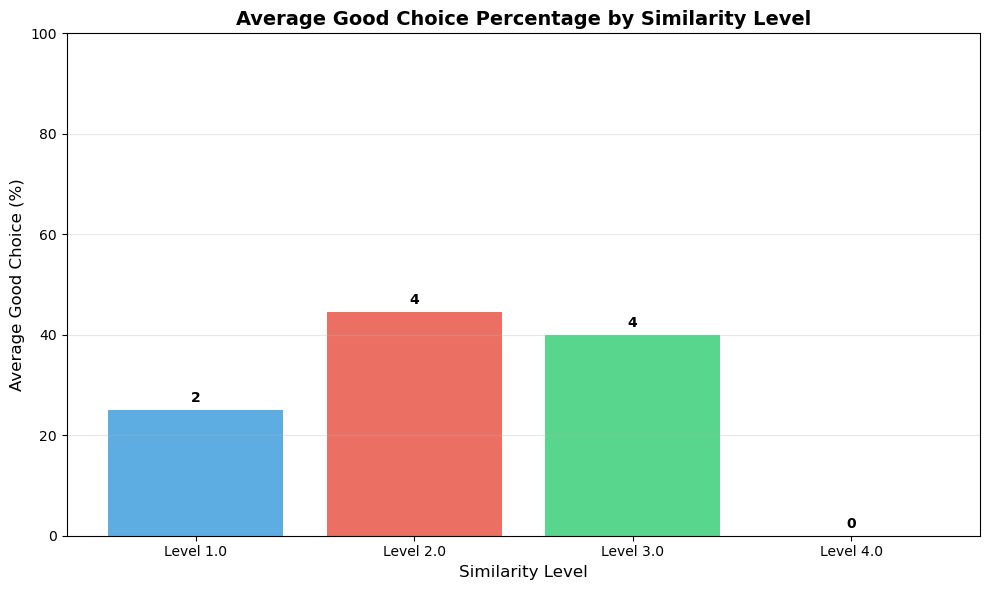

✅ Plot 1 completed: Average good choice percentages: ['25.0%', '44.4%', '40.0%', '0.0%']
📊 Correct choice counts: [2, 4, 4, 0]


In [241]:
# Create visualizations based on filtered_user_results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib for Jupyter notebook - use inline backend
%matplotlib inline

# Set up nice color palettes
plt.style.use('default')
colors_palette = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']  # Nice blues, reds, greens, oranges, purples
sns.set_palette("husl")

print("📊 Creating visualizations based on filtered_user_results...")

# 1. Average good_choice percentage by similarity level
print("\n1️⃣ Calculating average good_choice percentage by group...")

# Collect all good_choice columns
good_choice_cols = [col for col in user_results.columns if col.startswith('good_choice')]

# Calculate average good_choice for each similarity level
similarity_levels = sorted(user_results['similarity_level'].unique())[1:]
good_choice_averages = []
correct_choice_counts = []  # Store actual counts of correct choices

for level in similarity_levels:
    level_data = user_results[user_results['similarity_level'] == level]
    
    # Get all good_choice values for this level (excluding NaN)
    all_good_choices = []
    for col in good_choice_cols:
        valid_choices = level_data[col].dropna()
        all_good_choices.extend(valid_choices.tolist())
    
    if all_good_choices:
        avg_percentage = np.mean(all_good_choices) * 100
        correct_count = sum(all_good_choices)  # Count of correct choices (1s)
        good_choice_averages.append(avg_percentage)
        correct_choice_counts.append(correct_count)
        print(f"Level {level}: {avg_percentage:.1f}% ({len(all_good_choices)} total choices, {correct_count} correct)")
    else:
        good_choice_averages.append(0)
        correct_choice_counts.append(0)
        print(f"Level {level}: No valid choices")

# Plot 1: Average good_choice percentage by group
plt.figure(figsize=(10, 6))
bars1 = plt.bar(range(len(similarity_levels)), good_choice_averages, 
               color=colors_palette[:len(similarity_levels)], alpha=0.8)
plt.xlabel('Similarity Level', fontsize=12)
plt.ylabel('Average Good Choice (%)', fontsize=12)
plt.title('Average Good Choice Percentage by Similarity Level', fontsize=14, fontweight='bold')
plt.xticks(range(len(similarity_levels)), [f'Level {level}' for level in similarity_levels])
plt.ylim(0, 100)

# Add count labels on bars (number of correct choices instead of percentage)
for i, (percentage, count) in enumerate(zip(good_choice_averages, correct_choice_counts)):
    plt.text(i, percentage + 1, f'{int(count)}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✅ Plot 1 completed: Average good choice percentages: {[f'{x:.1f}%' for x in good_choice_averages]}")
print(f"📊 Correct choice counts: {[int(x) for x in correct_choice_counts]}")


2️⃣ Calculating average choice time by similarity level (using 'time_since_feedback')...
Level 1: 21.8s (n=8)
Level 2: 18.8s (n=9)
Level 3: 85.4s (n=8)
Level 4: 18.3s (n=3)


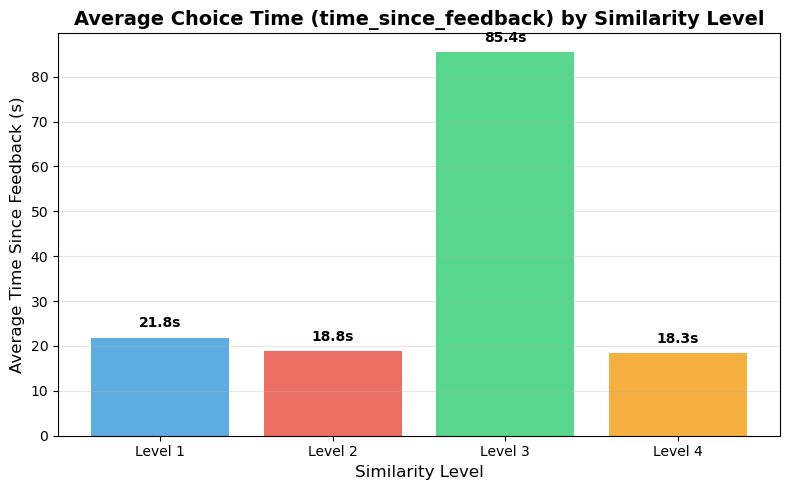

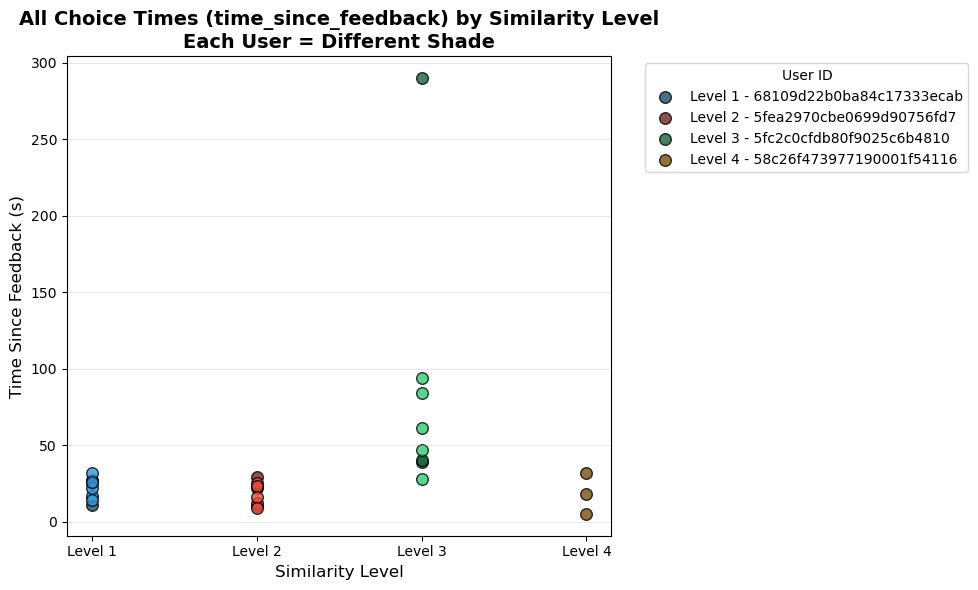

In [242]:
# 2. Average choice time by similarity level
print("\n2️⃣ Calculating average choice time by similarity level (using 'time_since_feedback')...")

# Calculate average time_since_feedback for each similarity level
avg_time_by_level = []
levels = sorted(user_choices_with_times['simillarity_level'].unique())
for level in levels:
    times = user_choices_with_times[user_choices_with_times['simillarity_level'] == level]['time_since_feedback'].dropna()
    avg = times.mean() if not times.empty else 0
    avg_time_by_level.append(avg)
    print(f"Level {level}: {avg:.1f}s (n={len(times)})")

# Plot 1: Bar plot of average time_since_feedback by similarity level
plt.figure(figsize=(8, 5))
bars = plt.bar([f'Level {int(l)}' for l in levels], avg_time_by_level, color=colors_palette[:len(levels)], alpha=0.8)
plt.xlabel('Similarity Level', fontsize=12)
plt.ylabel('Average Time Since Feedback (s)', fontsize=12)
plt.title('Average Choice Time (time_since_feedback) by Similarity Level', fontsize=14, fontweight='bold')
for i, v in enumerate(avg_time_by_level):
    if v > 0:
        plt.text(i, v + max(avg_time_by_level) * 0.02, f'{v:.1f}s', ha='center', va='bottom', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Scatter plot of all time_since_feedback values by similarity level, colored by user_id
import matplotlib.cm as cm

user_ids = user_choices_with_times['user_id'].unique()
num_users = len(user_ids)
cmap = plt.get_cmap('tab20', num_users)  # Use tab20 for up to 20 users, fallback to hsv if more

import matplotlib.colors as mcolors

plt.figure(figsize=(10, 6))

# Get unique similarity levels and assign a base color for each
levels_sorted = sorted(user_choices_with_times['simillarity_level'].unique())
base_colors = colors_palette[:len(levels_sorted)]

# Map similarity_level to base color
level_to_color = {level: base_colors[i % len(base_colors)] for i, level in enumerate(levels_sorted)}

# For each similarity level, plot each user's points with a different shade
for i, level in enumerate(levels_sorted):
    level_data = user_choices_with_times[user_choices_with_times['simillarity_level'] == level]
    users_in_level = level_data['user_id'].unique()
    base_color = mcolors.to_rgb(level_to_color[level])
    for j, user_id in enumerate(users_in_level):
        user_data = level_data[level_data['user_id'] == user_id]
        # Generate a shade by adjusting the lightness
        shade_factor = 0.5 + 0.5 * (j / max(1, len(users_in_level)-1))  # from 0.5 to 1.0
        user_color = tuple([c * shade_factor for c in base_color])
        plt.scatter(
            [level] * len(user_data),
            user_data['time_since_feedback'],
            color=user_color,
            alpha=0.8,
            s=70,
            edgecolor='k',
            label=f'Level {int(level)} - {user_id}' if (num_users <= 12 and j == 0) else None  # Only label first user per level if not too many users
        )

plt.xlabel('Similarity Level', fontsize=12)
plt.ylabel('Time Since Feedback (s)', fontsize=12)
plt.title('All Choice Times (time_since_feedback) by Similarity Level\nEach User = Different Shade', fontsize=14, fontweight='bold')
plt.xticks(levels_sorted, [f'Level {int(l)}' for l in levels_sorted])
plt.grid(axis='y', alpha=0.3)
if num_users <= 12:
    plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



3️⃣ Calculating average choice time by episode and group...

Episode 1:
  Level 1.0: 22.0s (2 users)
  Level 2.0: 24.0s (2 users)
  Level 3.0: 94.0s (1 users)
  Level 4.0: 32.0s (1 users)

Episode 2:
  Level 1.0: 32.0s (1 users)
  Level 2.0: 20.5s (2 users)
  Level 3.0: 50.0s (2 users)
  Level 4.0: 18.0s (1 users)

Episode 3:
  Level 1.0: 19.5s (2 users)
  Level 2.0: 23.0s (1 users)
  Level 3.0: 84.0s (1 users)
  Level 4.0: 5.0s (1 users)

Episode 4:
  Level 1.0: 16.5s (2 users)
  Level 2.0: 19.0s (2 users)
  Level 3.0: 168.5s (2 users)
  Level 4.0: No valid times

Episode 5:
  Level 1.0: 26.0s (1 users)
  Level 2.0: 9.5s (2 users)
  Level 3.0: 34.0s (2 users)
  Level 4.0: No valid times


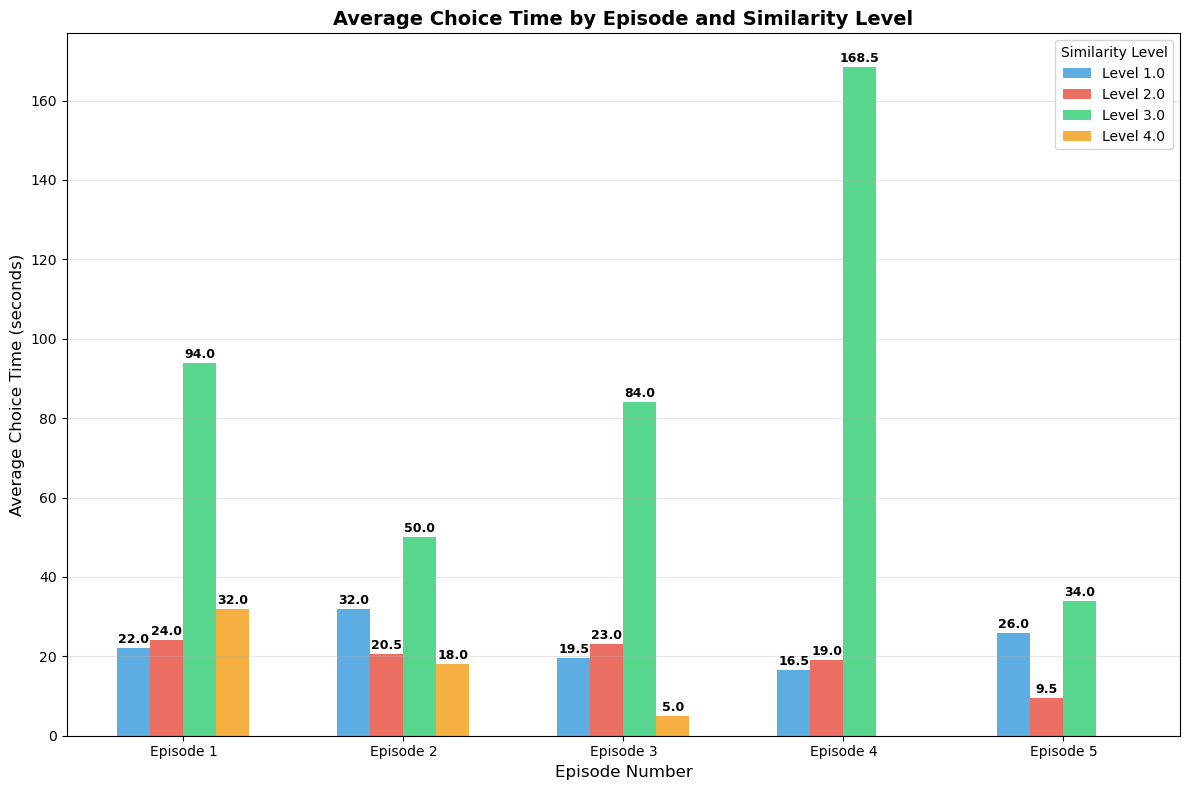

✅ Plot 3 completed: Choice time by episode and similarity level


In [243]:
# 3. Average choice time for each episode and similarity level
print("\n3️⃣ Calculating average choice time by episode and group...")

# Create data for heatmap/grouped bar plot
episode_choice_times = {level: [] for level in similarity_levels}

for episode in range(1, 6):
    col_name = f'choice_time{episode}'
    print(f"\nEpisode {episode}:")
    
    for level in similarity_levels:
        level_data = user_results[user_results['similarity_level'] == level]
        valid_times = level_data[col_name].dropna()
        
        if len(valid_times) > 0:
            avg_time = valid_times.mean()
            episode_choice_times[level].append(avg_time)
            print(f"  Level {level}: {avg_time:.1f}s ({len(valid_times)} users)")
        else:
            episode_choice_times[level].append(0)
            print(f"  Level {level}: No valid times")

# Plot 3: Choice time by episode and group
plt.figure(figsize=(12, 8))

# Create grouped bar plot
episodes = list(range(1, 6))
x = np.arange(len(episodes))
width = 0.15

for i, level in enumerate(similarity_levels):
    offset = (i - len(similarity_levels)/2 + 0.5) * width
    bars = plt.bar(x + offset, episode_choice_times[level], width, 
                 label=f'Level {level}', color=colors_palette[i], alpha=0.8)
    
    # Add value labels on bars
    for j, v in enumerate(episode_choice_times[level]):
        if v > 0:  # Only show label if there's data
            plt.text(x[j] + offset, v + 0.5, f'{v:.1f}', ha='center', va='bottom', 
                   fontsize=9, fontweight='bold')

plt.xlabel('Episode Number', fontsize=12)
plt.ylabel('Average Choice Time (seconds)', fontsize=12)
plt.title('Average Choice Time by Episode and Similarity Level', fontsize=14, fontweight='bold')
plt.xticks(x, [f'Episode {i}' for i in episodes])
plt.legend(title='Similarity Level', loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Plot 3 completed: Choice time by episode and similarity level")


4️⃣ Analyzing trust the agent by group...
Trust values: 1 = Do not trust, 2 = Trust, None = No answer

Level 1.0:
  Total users who answered: 0
  Users who trust (2): 0 (0.0%)
  Users who don't trust (1): 0 (100.0%)

Level 2.0:
  Total users who answered: 0
  Users who trust (2): 0 (0.0%)
  Users who don't trust (1): 0 (100.0%)

Level 3.0:
  Total users who answered: 0
  Users who trust (2): 0 (0.0%)
  Users who don't trust (1): 0 (100.0%)

Level 4.0:
  Total users who answered: 0
  Users who trust (2): 0 (0.0%)
  Users who don't trust (1): 0 (100.0%)


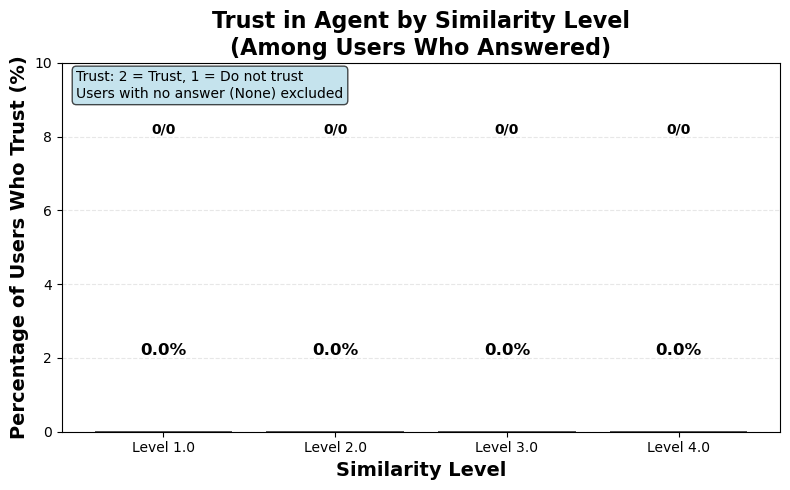


✅ Trust analysis completed!
📊 Summary:
Level 1.0: 0/0 trust (0.0%)
Level 2.0: 0/0 trust (0.0%)
Level 3.0: 0/0 trust (0.0%)
Level 4.0: 0/0 trust (0.0%)

🎉 All visualizations completed successfully!


In [244]:
# 4. Trust the agent analysis by similarity level (Trust vs No Trust)
print("\n4️⃣ Analyzing trust the agent by group...")
print("Trust values: 1 = Do not trust, 2 = Trust, None = No answer")

# Calculate trust statistics for each similarity level (excluding None values)
trust_analysis = {}

for level in similarity_levels:
    level_data = user_results[user_results['similarity_level'] == level]
    
    # Remove None values (users who didn't answer)
    answered_data = level_data['Trust_the_agent'].dropna()
    
    total_answered = len(answered_data)
    trust_count = (answered_data == 2).sum()  # Count users who trust (value 2)
    no_trust_count = (answered_data == 1).sum()  # Count users who don't trust (value 1)
    
    if total_answered > 0:
        trust_percentage = (trust_count / total_answered) * 100
    else:
        trust_percentage = 0
    
    trust_analysis[level] = {
        'total_answered': total_answered,
        'trust_count': trust_count,
        'no_trust_count': no_trust_count,
        'trust_percentage': trust_percentage
    }
    
    print(f"\nLevel {level}:")
    print(f"  Total users who answered: {total_answered}")
    print(f"  Users who trust (2): {trust_count} ({trust_percentage:.1f}%)")
    print(f"  Users who don't trust (1): {no_trust_count} ({100-trust_percentage:.1f}%)")

# Prepare data for plotting
trust_percentages = [trust_analysis[level]['trust_percentage'] for level in similarity_levels]
trust_counts = [trust_analysis[level]['trust_count'] for level in similarity_levels]
total_answered = [trust_analysis[level]['total_answered'] for level in similarity_levels]

# Plot: Trust percentage among respondents
plt.figure(figsize=(8, 5))

# Create bar plot
x = np.arange(len(similarity_levels))
bars = plt.bar(x, trust_percentages, color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6'][:len(similarity_levels)], 
               alpha=0.8, edgecolor='black', linewidth=1.2)

# Add value labels on bars (percentage and count)
for i, (percentage, count, total) in enumerate(zip(trust_percentages, trust_counts, total_answered)):
    # Percentage label
    plt.text(i, percentage + 2, f'{percentage:.1f}%', ha='center', va='bottom', 
            fontsize=12, fontweight='bold')
    # Count label inside bar
    if percentage > 10:  # Only show inside if bar is tall enough
        plt.text(i, percentage/2, f'{count}/{total}', ha='center', va='center', 
                fontsize=11, fontweight='bold', color='white')
    else:
        plt.text(i, percentage + 8, f'{count}/{total}', ha='center', va='bottom', 
                fontsize=10, fontweight='bold')

plt.xlabel('Similarity Level', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Users Who Trust (%)', fontsize=14, fontweight='bold')
plt.title('Trust in Agent by Similarity Level\n(Among Users Who Answered)', fontsize=16, fontweight='bold')
plt.xticks(x, [f'Level {level}' for level in similarity_levels])
plt.ylim(0, max(trust_percentages) * 1.2 + 10)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add a text box with explanation
textstr = 'Trust: 2 = Trust, 1 = Do not trust\nUsers with no answer (None) excluded'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.7)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

print("\n✅ Trust analysis completed!")
print(f"📊 Summary:")
for level in similarity_levels:
    data = trust_analysis[level]
    print(f"Level {level}: {data['trust_count']}/{data['total_answered']} trust ({data['trust_percentage']:.1f}%)")

print("\n🎉 All visualizations completed successfully!")

In [245]:
# Count the number of good_choice == 1 and good_choice == 0 for similarity_level >= 3
mask = user_results['similarity_level'] >= 3
good_choice_cols = [col for col in user_results.columns if col.startswith('good_choice')]

# Flatten all good_choice values for users with similarity_level >= 3
good_choices = user_results.loc[mask, good_choice_cols].values.flatten()
good_choices = pd.Series(good_choices).dropna()

num_good = (good_choices == 1).sum()
num_bad = (good_choices == 0).sum()

print(f"Number of good_choice == 1 (good): {num_good}")
print(f"Number of good_choice == 0 (bad): {num_bad}")

Number of good_choice == 1 (good): 4
Number of good_choice == 0 (bad): 9


In [246]:
# Create `plot_df` for the bar chart visualization
 
import pandas as pd
 
plot_rows = []
 
for _, row in user_choices.iterrows():
 
    # Include only similarity levels >= 3 with valid data
 
    if row['simillarity_level'] >= 3 and pd.notna(row['episode_index']) and pd.notna(row['examples_shown']):
 
        user_id = row['user_id']
 
        episode = int(row['episode_index'])
 
        good_choice_col = f'good_choice{episode}'
 
        user_row = user_results[user_results['user_id'] == user_id]
 
        if user_row.empty or good_choice_col not in user_row.columns:
 
            continue
 
        good_choice = int(user_row.iloc[0][good_choice_col])
 
        plot_rows.append({
 
            'examples_shown': int(row['examples_shown']),
 
            'episode_index': episode,
 
            'good_choice': good_choice,
 
            'user_id': user_id
 
        })
 
plot_df = pd.DataFrame(plot_rows)
 
print('plot_df created with shape:', plot_df.shape)
 
plot_df.head()

plot_df created with shape: (13, 4)


,examples_shown,episode_index,good_choice,user_id
0,4,1,0,58c26f473977190001f54116
1,4,2,0,58c26f473977190001f54116
2,1,3,0,58c26f473977190001f54116
3,1,1,0,5fc2c0cfdb80f9025c6b4810
4,1,2,1,5fc2c0cfdb80f9025c6b4810


In [247]:
# Create DataFrame `plot_df` for plotting
import pandas as pd

plot_rows = []
for _, row in user_choices_with_times.iterrows():
    if row['simillarity_level'] >= 1 and pd.notna(row['episode_index']) and pd.notna(row['examples_shown']):
        user_id = row['user_id']
        episode = int(row['episode_index'])
        good_choice_col = f'good_choice{episode}'
        user_row = user_results[user_results['user_id'] == user_id]
        if user_row.empty or good_choice_col not in user_row.columns:
            continue
        good_choice = int(user_row.iloc[0][good_choice_col])
        plot_rows.append({
            'examples_shown': int(row['examples_shown']),
            'episode_index': episode,
            'good_choice': good_choice,
            'user_id': user_id
        })
plot_df = pd.DataFrame(plot_rows)



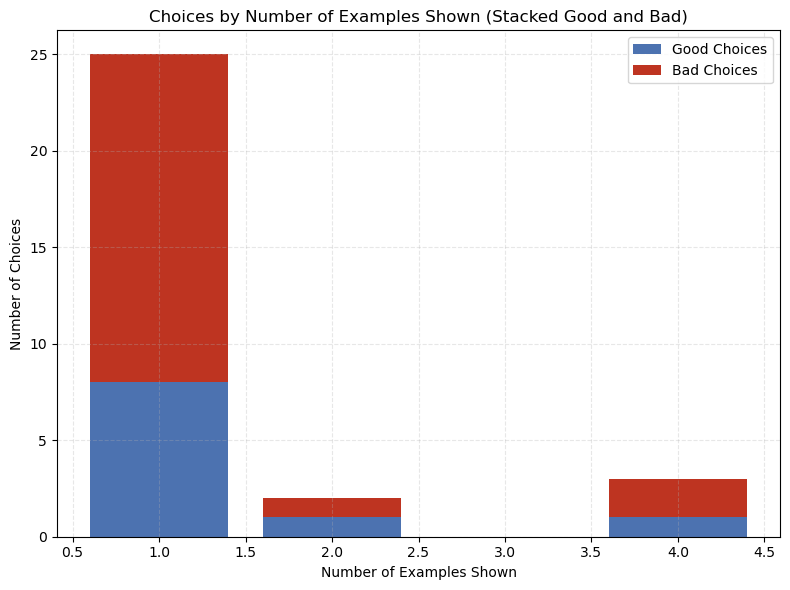

In [248]:
# Plot
import matplotlib.pyplot as plt

# Plot bar chart of counts by examples_shown and good/bad choices
counts = plot_df.groupby(['examples_shown', 'good_choice']).size().unstack(fill_value=0)
good_counts = counts.get(1, pd.Series(0, index=counts.index))
bad_counts = counts.get(0, pd.Series(0, index=counts.index))
plt.figure(figsize=(8, 6))
# Use muted color tones
plt.bar(counts.index, good_counts, color='#4c72b0', label='Good Choices')
plt.bar(counts.index, bad_counts, bottom=good_counts, color="#be3421", label='Bad Choices')
plt.xlabel('Number of Examples Shown')
plt.ylabel('Number of Choices')
plt.title('Choices by Number of Examples Shown (Stacked Good and Bad)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

30


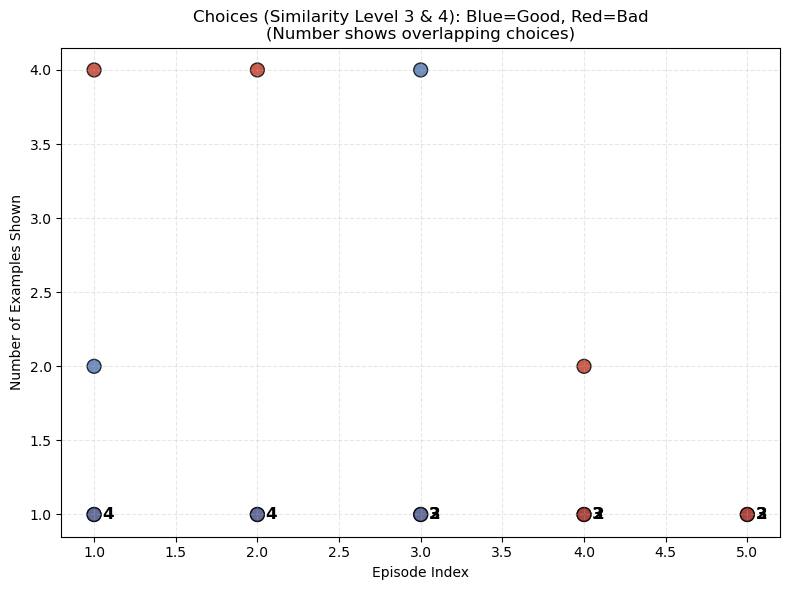

In [249]:
from collections import Counter
import matplotlib.pyplot as plt

# Only include similarity levels
plot_points = []
for _, row in user_choices_with_times.iterrows():
    if row['simillarity_level'] in [1, 2, 3, 4] and pd.notna(row['examples_shown']) and pd.notna(row['episode_index']):
        user_id = row['user_id']
        episode = int(row['episode_index'])
        examples = int(row['examples_shown'])
        good_choice_col = f'good_choice{episode}'
        user_row = user_results[user_results['user_id'] == user_id]
        if user_row.empty or good_choice_col not in user_row.columns:
            continue
        good_choice = user_row.iloc[0][good_choice_col]
        if pd.isna(good_choice):
            continue
        plot_points.append((episode, examples, int(good_choice)))

print(len(plot_points))
# Count occurrences for each (episode, examples, good_choice)
point_counts = Counter((ep, ex, gc) for ep, ex, gc in plot_points)

# Prepare lists for plotting
xs, ys, colors, sizes, labels = [], [], [], [], []
for (ep, ex, gc), count in point_counts.items():
    xs.append(ep)
    ys.append(ex)
    colors.append('#4c72b0' if gc == 1 else '#be3421')
    sizes.append(100)
    labels.append(str(count) if count > 1 else "")

plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, c=colors, s=sizes, edgecolor='k', alpha=0.8)

# Annotate points with count if more than 1
for x, y, label in zip(xs, ys, labels):
    if label:
        plt.text(x + 0.05, y, label, fontsize=12, fontweight='bold', color='black', va='center')

plt.xlabel('Episode Index')
plt.ylabel('Number of Examples Shown')
plt.title('Choices (Similarity Level 3 & 4): Blue=Good, Red=Bad\n(Number shows overlapping choices)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



5️⃣ Analyzing number of examples shown by similarity level...
Level 1: Average 1.6 examples (8 choices, 13.0 total examples)
Level 2: Average 1.0 examples (9 choices, 9.0 total examples)
Level 3: Average 1.0 examples (10 choices, 10.0 total examples)
Level 4: Average 3.0 examples (3 choices, 9.0 total examples)


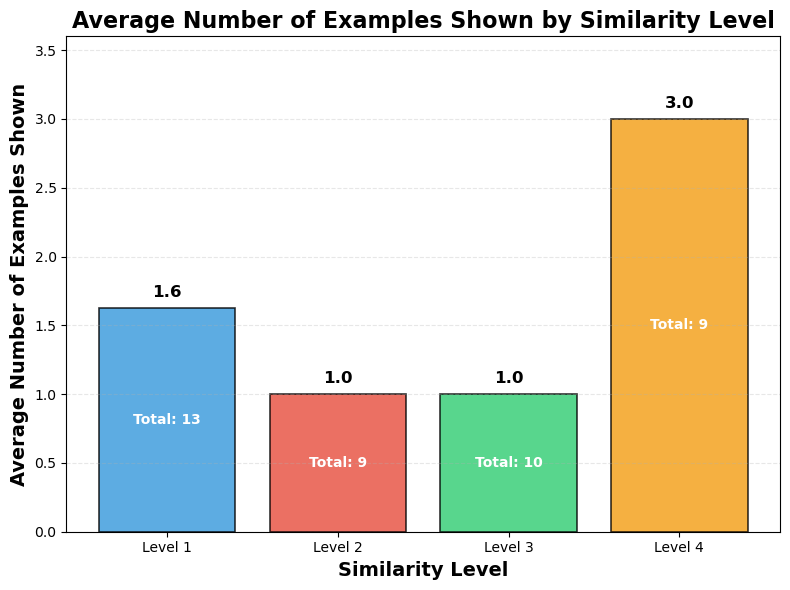

✅ Plot completed: Average examples shown by similarity level
📊 Summary: {1: '1.6', 2: '1.0', 3: '1.0', 4: '3.0'}


In [250]:
# Plot: Number of examples shown at each similarity level
print("\n5️⃣ Analyzing number of examples shown by similarity level...")

# Get data for similarity levels >= 3 (where examples_shown is available)
examples_data = user_choices_with_times[
    (user_choices_with_times['simillarity_level'] >= 1) & 
    (user_choices_with_times['examples_shown'].notna())
].copy()

if not examples_data.empty:
    # Calculate average examples shown for each similarity level
    avg_examples_by_level = []
    example_counts_by_level = []
    similarity_levels_with_examples = sorted(examples_data['simillarity_level'].unique())
    
    for level in similarity_levels_with_examples:
        level_data = examples_data[examples_data['simillarity_level'] == level]
        avg_examples = level_data['examples_shown'].mean()
        total_examples = level_data['examples_shown'].sum()
        avg_examples_by_level.append(avg_examples)
        example_counts_by_level.append(total_examples)
        print(f"Level {level}: Average {avg_examples:.1f} examples ({len(level_data)} choices, {total_examples} total examples)")
    
    # Create the plot using the same style as previous plots
    plt.figure(figsize=(8, 6))
    bars = plt.bar(range(len(similarity_levels_with_examples)), avg_examples_by_level, 
                   color=colors_palette[:len(similarity_levels_with_examples)], alpha=0.8,
                   edgecolor='black', linewidth=1.2)
    
    plt.xlabel('Similarity Level', fontsize=14, fontweight='bold')
    plt.ylabel('Average Number of Examples Shown', fontsize=14, fontweight='bold')
    plt.title('Average Number of Examples Shown by Similarity Level', fontsize=16, fontweight='bold')
    plt.xticks(range(len(similarity_levels_with_examples)), 
               [f'Level {int(level)}' for level in similarity_levels_with_examples])
    
    # Add value labels on bars
    for i, (avg_val, total_val) in enumerate(zip(avg_examples_by_level, example_counts_by_level)):
        plt.text(i, avg_val + max(avg_examples_by_level) * 0.02, f'{avg_val:.1f}', 
                ha='center', va='bottom', fontsize=12, fontweight='bold')
        # Add total count inside the bar if it's tall enough
        if avg_val > max(avg_examples_by_level) * 0.2:
            plt.text(i, avg_val/2, f'Total: {int(total_val)}', ha='center', va='center', 
                    fontsize=10, fontweight='bold', color='white')
    
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.ylim(0, max(avg_examples_by_level) * 1.2)
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Plot completed: Average examples shown by similarity level")
    print(f"📊 Summary: {dict(zip(similarity_levels_with_examples, [f'{x:.1f}' for x in avg_examples_by_level]))}")
    
else:
    print("❌ No data available for examples_shown analysis")

In [251]:
# 6. Feedback count per user by episode with agent improvement analysis
print("\n6️⃣ Analyzing feedback counts per user by episode and agent improvement...")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

# Get feedback data for prolific users
feedback_data = user_feedback_prolific.copy()
choice_data = user_choices_prolific.copy()

# Create a comprehensive analysis DataFrame
user_episode_analysis = []

# Get unique users
unique_users = feedback_data['user_id'].unique()

for user_id in unique_users:
    if len(user_id) < 20:  # Skip non-prolific users
        continue
        
    user_feedback = feedback_data[feedback_data['user_id'] == user_id]
    user_choices = choice_data[choice_data['user_id'] == user_id]
    
    # For each episode (1-5)
    for episode in range(1, 6):
        # Count feedbacks for this episode
        episode_feedbacks = user_feedback[user_feedback['episode_index'] == episode]
        feedback_count = len(episode_feedbacks)
        
        # Get choice information for this episode
        episode_choices = user_choices[user_choices['episode_index'] == episode]
        
        if len(episode_choices) > 0:
            choice_info = episode_choices.iloc[0]
            old_path = choice_info['old_agent_path']
            new_path = choice_info['new_agent_path']
            
            # Determine if new agent is better
            old_model_name = path_to_name.get(old_path)
            new_model_name = path_to_name.get(new_path)
            
            if old_model_name and new_model_name:
                old_score = models_mean_scores.get(old_model_name, 0)
                new_score = models_mean_scores.get(new_model_name, 0)
                is_new_better = new_score > old_score
            else:
                is_new_better = None
                
            user_episode_analysis.append({
                'user_id': user_id,
                'episode': episode,
                'feedback_count': feedback_count,
                'is_new_better': is_new_better,
                'old_score': old_score if old_model_name else None,
                'new_score': new_score if new_model_name else None,
                'old_model': old_model_name,
                'new_model': new_model_name
            })
        else:
            # No choice data for this episode
            user_episode_analysis.append({
                'user_id': user_id,
                'episode': episode,
                'feedback_count': feedback_count,
                'is_new_better': None,
                'old_score': None,
                'new_score': None,
                'old_model': None,
                'new_model': None
            })

# Convert to DataFrame
analysis_df = pd.DataFrame(user_episode_analysis)

# Filter out episodes with no data
analysis_df = analysis_df[analysis_df['feedback_count'] > 0]

print(f"📊 Analysis complete: {len(analysis_df)} user-episode combinations with feedback")
print(f"👥 Users: {len(analysis_df['user_id'].unique())}")
print(f"📈 Episodes: {sorted(analysis_df['episode'].unique())}")

# Show summary statistics
print(f"\n📋 Summary by episode:")
for episode in sorted(analysis_df['episode'].unique()):
    episode_data = analysis_df[analysis_df['episode'] == episode]
    total_feedback = episode_data['feedback_count'].sum()
    avg_feedback = episode_data['feedback_count'].mean()
    better_count = episode_data['is_new_better'].sum() if episode_data['is_new_better'].notna().any() else 0
    total_with_choice = episode_data['is_new_better'].notna().sum()
    
    print(f"  Episode {episode}: {total_feedback} total feedbacks, {avg_feedback:.1f} avg/user, "
          f"{better_count}/{total_with_choice} cases where new > old")

analysis_df.head(10)


6️⃣ Analyzing feedback counts per user by episode and agent improvement...
📊 Analysis complete: 31 user-episode combinations with feedback
👥 Users: 9
📈 Episodes: [1, 2, 3, 4, 5]

📋 Summary by episode:
  Episode 1: 15 total feedbacks, 2.1 avg/user, 5/7 cases where new > old
  Episode 2: 18 total feedbacks, 3.0 avg/user, 5/6 cases where new > old
  Episode 3: 16 total feedbacks, 2.7 avg/user, 2/6 cases where new > old
  Episode 4: 16 total feedbacks, 2.7 avg/user, 4/6 cases where new > old
  Episode 5: 10 total feedbacks, 1.7 avg/user, 3/5 cases where new > old


,user_id,episode,feedback_count,is_new_better,old_score,new_score,old_model,new_model
0,5fea2970cbe0699d90756fd7,1,1,True,1.98,4.51,AllColorsLL1_0526,AllColorsLH_0617
1,5fea2970cbe0699d90756fd7,2,1,True,4.51,5.38,AllColorsLH_0617,NoRedLH3_0612
5,68109d22b0ba84c17333ecab,1,1,False,1.98,1.66,AllColorsLL1_0526,OnlyBlueLL_0625
7,68109d22b0ba84c17333ecab,3,2,False,1.66,-2.04,OnlyBlueLL_0625,OnlyGreenLL_0429
8,68109d22b0ba84c17333ecab,4,2,True,-2.04,3.68,OnlyGreenLL_0429,NoRedLL_0616
14,62916bb383e38e21d42cef2b,5,1,None,NaN,NaN,None,None
15,5fc2c0cfdb80f9025c6b4810,1,2,True,1.98,4.51,AllColorsLL1_0526,AllColorsLH_0617
16,5fc2c0cfdb80f9025c6b4810,2,1,True,4.51,5.38,AllColorsLH_0617,NoRedLH3_0612
17,5fc2c0cfdb80f9025c6b4810,3,5,False,5.38,3.49,NoRedLH3_0612,OnlyBlueLH_0706
18,5fc2c0cfdb80f9025c6b4810,4,2,True,3.49,5.38,OnlyBlueLH_0706,NoRedLH3_0612


In [252]:
# 6. Feedback count per user by similarity level with agent improvement analysis
print("\n6️⃣ Analyzing feedback counts per user by similarity level and agent improvement...")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

# Get feedback data for prolific users
feedback_data = user_feedback_prolific.copy()
choice_data = user_choices_prolific.copy()

# Create a comprehensive analysis DataFrame
user_similarity_analysis = []

# Get unique users
unique_users = feedback_data['user_id'].unique()

for user_id in unique_users:
    if len(user_id) < 20:  # Skip non-prolific users
        continue
        
    user_feedback = feedback_data[feedback_data['user_id'] == user_id]
    user_choices = choice_data[choice_data['user_id'] == user_id]
    
    # Get the user's similarity level (should be consistent across all their choices)
    if len(user_choices) > 0:
        similarity_level = user_choices['simillarity_level'].iloc[0]
    else:
        continue  # Skip if no choices
    
    # For each episode (1-5)
    for episode in range(1, 6):
        # Count feedbacks for this episode
        episode_feedbacks = user_feedback[user_feedback['episode_index'] == episode]
        feedback_count = len(episode_feedbacks)
        
        # Get choice information for this episode
        episode_choices = user_choices[user_choices['episode_index'] == episode]
        
        if len(episode_choices) > 0:
            choice_info = episode_choices.iloc[0]
            old_path = choice_info['old_agent_path']
            new_path = choice_info['new_agent_path']
            
            # Determine if new agent is better
            old_model_name = path_to_name.get(old_path)
            new_model_name = path_to_name.get(new_path)
            
            if old_model_name and new_model_name:
                old_score = models_mean_scores.get(old_model_name, 0)
                new_score = models_mean_scores.get(new_model_name, 0)
                is_new_better = new_score > old_score
            else:
                is_new_better = None
                
            user_similarity_analysis.append({
                'user_id': user_id,
                'similarity_level': similarity_level,
                'episode': episode,
                'feedback_count': feedback_count,
                'is_new_better': is_new_better,
                'old_score': old_score if old_model_name else None,
                'new_score': new_score if new_model_name else None,
                'old_model': old_model_name,
                'new_model': new_model_name
            })
        else:
            # No choice data for this episode
            user_similarity_analysis.append({
                'user_id': user_id,
                'similarity_level': similarity_level,
                'episode': episode,
                'feedback_count': feedback_count,
                'is_new_better': None,
                'old_score': None,
                'new_score': None,
                'old_model': None,
                'new_model': None
            })

# Convert to DataFrame
analysis_df = pd.DataFrame(user_similarity_analysis)

# Filter out episodes with no data and group by similarity level
analysis_df = analysis_df[analysis_df['feedback_count'] > 0]

# Aggregate by user and similarity level (sum feedbacks across all episodes)
user_similarity_agg = analysis_df.groupby(['user_id', 'similarity_level']).agg({
    'feedback_count': 'sum',
    'is_new_better': lambda x: x.sum() if x.notna().any() else None,  # Count of cases where new is better
    'episode': 'count'  # Count of episodes with feedback
}).reset_index()

# Also count total comparisons per user
comparison_counts = analysis_df[analysis_df['is_new_better'].notna()].groupby(['user_id', 'similarity_level']).size().reset_index(name='total_comparisons')
user_similarity_agg = user_similarity_agg.merge(comparison_counts, on=['user_id', 'similarity_level'], how='left')
user_similarity_agg['total_comparisons'] = user_similarity_agg['total_comparisons'].fillna(0)

print(f"📊 Analysis complete: {len(user_similarity_agg)} user-similarity combinations with feedback")
print(f"👥 Users: {len(user_similarity_agg['user_id'].unique())}")
print(f"📈 Similarity levels: {sorted(user_similarity_agg['similarity_level'].unique())}")

# Show summary statistics by similarity level
print(f"\n📋 Summary by similarity level:")
for level in sorted(user_similarity_agg['similarity_level'].unique()):
    level_data = user_similarity_agg[user_similarity_agg['similarity_level'] == level]
    total_feedback = level_data['feedback_count'].sum()
    avg_feedback = level_data['feedback_count'].mean()
    better_count = level_data['is_new_better'].sum() if level_data['is_new_better'].notna().any() else 0
    total_comparisons = level_data['total_comparisons'].sum()
    
    print(f"  Level {level}: {total_feedback} total feedbacks, {avg_feedback:.1f} avg/user, "
          f"{better_count}/{total_comparisons} cases where new > old ({better_count/max(1,total_comparisons)*100:.1f}%)")

user_similarity_agg.head(10)


6️⃣ Analyzing feedback counts per user by similarity level and agent improvement...
📊 Analysis complete: 8 user-similarity combinations with feedback
👥 Users: 8
📈 Similarity levels: [1, 2, 3, 4]

📋 Summary by similarity level:
  Level 1: 21 total feedbacks, 10.5 avg/user, 5/8 cases where new > old (62.5%)
  Level 2: 29 total feedbacks, 9.7 avg/user, 8/9 cases where new > old (88.9%)
  Level 3: 18 total feedbacks, 9.0 avg/user, 6/10 cases where new > old (60.0%)
  Level 4: 6 total feedbacks, 6.0 avg/user, 0/3 cases where new > old (0.0%)


,user_id,similarity_level,feedback_count,is_new_better,episode,total_comparisons
0,58c26f473977190001f54116,4,6,0,3,3
1,5c6e60b04e08ad00018cc995,3,7,3,5,5
2,5fc2c0cfdb80f9025c6b4810,3,11,3,5,5
3,5fea2970cbe0699d90756fd7,2,2,2,2,2
4,659c0682d109f8537a89fdd3,1,16,4,5,5
5,66a35864d80b66f563731c3e,2,25,4,5,5
6,66fd3f6c93c24ecc119be354,2,2,2,2,2
7,68109d22b0ba84c17333ecab,1,5,1,3,3


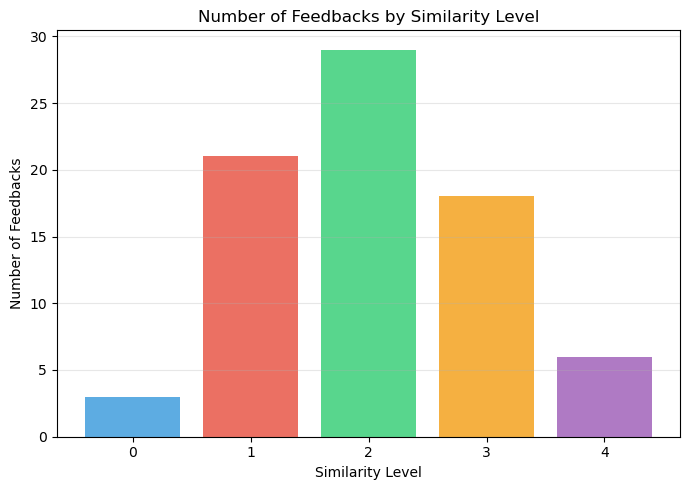

In [253]:
import matplotlib.pyplot as plt

# Group user_feedback_prolific by similarity_level and count feedbacks
feedback_counts_by_level = user_feedback_prolific.groupby('similarity_level').size()

plt.figure(figsize=(7, 5))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']
plt.bar(feedback_counts_by_level.index.astype(int), feedback_counts_by_level.values, color=colors[:len(feedback_counts_by_level)], alpha=0.8)
plt.xlabel('Similarity Level')
plt.ylabel('Number of Feedbacks')
plt.title('Number of Feedbacks by Similarity Level')
plt.xticks(feedback_counts_by_level.index.astype(int))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Testing the Times

In [254]:
import pandas as pd

user_choices = all_tabels['user_choices']
# Filter only rows after 2025-08-06
filter_date = pd.to_datetime('2025-08-06')
feedback_actions['timestamp'] = pd.to_datetime(feedback_actions['timestamp'])
user_choices['timestamp'] = pd.to_datetime(user_choices['timestamp'])
# Fix: Use errors='coerce' and infer_datetime_format for mixed formats
user_choices['demonstration_time'] = pd.to_datetime(
                                                user_choices['demonstration_time'], 
                                                errors='coerce')
feedback_after_date = feedback_actions[feedback_actions['timestamp'] > filter_date]
user_choices_after_date = user_choices[user_choices['timestamp'] > filter_date]
print(user_choices_after_date[['timestamp','demonstration_time', 'examples_shown']].tail(10))

print(f"Feedback actions after 2025-08-06: {len(feedback_after_date)}")
print(f"User choices after 2025-08-06: {len(user_choices_after_date)}")

              timestamp demonstration_time  examples_shown
358 2025-08-11 14:26:43                NaT             1.0
359 2025-08-11 14:28:34                NaT             1.0
360 2025-08-11 14:44:01                NaT             1.0
361 2025-08-11 14:45:39                NaT             1.0
362 2025-08-11 14:46:57                NaT             1.0
363 2025-08-11 15:14:28                NaT             1.0
364 2025-08-11 15:17:08                NaT             1.0
365 2025-08-11 15:20:40                NaT             1.0
366 2025-08-11 15:22:32                NaT             1.0
367 2025-08-11 15:25:07                NaT             1.0
Feedback actions after 2025-08-06: 191
User choices after 2025-08-06: 93


In [255]:
user_choices[['examples_shown', 'episode_index', 'timestamp', 'demonstration_time']].tail(10)

,examples_shown,episode_index,timestamp,demonstration_time
358,1.0,4,2025-08-11 14:26:43,NaT
359,1.0,5,2025-08-11 14:28:34,NaT
360,1.0,3,2025-08-11 14:44:01,NaT
361,1.0,4,2025-08-11 14:45:39,NaT
362,1.0,5,2025-08-11 14:46:57,NaT
363,1.0,1,2025-08-11 15:14:28,NaT
364,1.0,2,2025-08-11 15:17:08,NaT
365,1.0,3,2025-08-11 15:20:40,NaT
366,1.0,4,2025-08-11 15:22:32,NaT
367,1.0,5,2025-08-11 15:25:07,NaT
